<a href="https://colab.research.google.com/github/nirajband/FMML_Projects_and-Labs/blob/main/RNN_Name_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Recurrent Neural Network (RNN) for sequential data processing.

In [20]:
# RNNs are designed to process sequential data by maintaining a hidden state
# that captures information about previous inputs. They are widely used in tasks
# like language modeling, time series prediction, and sequential decision making.


In [5]:
import os
import zipfile
import pandas as pd

# Define the path to your zip file and the directory where you want to extract it
zip_file_path = '/content/archive (2).zip'
extract_to_directory = '/content/extracted'

# Ensure the extraction directory exists
os.makedirs(extract_to_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# List all files under the extracted directory
print("Extracted files:")
for dirname, _, filenames in os.walk(extract_to_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Assuming there is a single CSV file, we'll load it dynamically.
# If there are multiple CSV files, you may need to specify the correct one.
csv_files = [f for f in os.listdir(extract_to_directory) if f.endswith('.csv')]
if len(csv_files) == 0:
    print("No CSV file found in the extracted directory.")
elif len(csv_files) > 1:
    print("Multiple CSV files found. Please specify the correct one.")
    print(csv_files)
else:
    csv_file_path = os.path.join(extract_to_directory, csv_files[0])

    # Load the CSV file into a pandas DataFrame
    data = pd.read_csv(csv_file_path)

    # Display the first few rows of the dataset
    print(data.head())

Extracted files:
/content/extracted/Scottish.txt
/content/extracted/Japanese.txt
/content/extracted/Russian.txt
/content/extracted/Spanish.txt
/content/extracted/Chinese.txt
/content/extracted/Irish.txt
/content/extracted/Korean.txt
/content/extracted/Czech.txt
/content/extracted/Greek.txt
/content/extracted/Italian.txt
/content/extracted/Polish.txt
/content/extracted/English.txt
/content/extracted/Vietnamese.txt
/content/extracted/Arabic.txt
/content/extracted/Portuguese.txt
/content/extracted/French.txt
/content/extracted/German.txt
/content/extracted/Dutch.txt
No CSV file found in the extracted directory.


In [6]:
import os
import zipfile
import glob
import unicodedata
import string

# Define the path to your zip file and the directory where you want to extract it
zip_file_path = '/content/archive (2).zip'
extract_to_directory = '/content/extracted'

# Ensure the extraction directory exists
os.makedirs(extract_to_directory, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# Function to find all text files in the extracted directory
def findFiles(path):
    return glob.glob(path)

print(findFiles(os.path.join(extract_to_directory, '*.txt')))

# ASCII characters and the normalization function
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# Use the findFiles function to get all .txt files from the extracted directory
for filename in findFiles(os.path.join(extract_to_directory, '*.txt')):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

print("Categories:", all_categories)
print("Number of categories:", n_categories)
print("Sample data from 'English':", category_lines.get('English', [])[:5])  # Adjust 'English' to any other category you know exists

['/content/extracted/Scottish.txt', '/content/extracted/Japanese.txt', '/content/extracted/Russian.txt', '/content/extracted/Spanish.txt', '/content/extracted/Chinese.txt', '/content/extracted/Irish.txt', '/content/extracted/Korean.txt', '/content/extracted/Czech.txt', '/content/extracted/Greek.txt', '/content/extracted/Italian.txt', '/content/extracted/Polish.txt', '/content/extracted/English.txt', '/content/extracted/Vietnamese.txt', '/content/extracted/Arabic.txt', '/content/extracted/Portuguese.txt', '/content/extracted/French.txt', '/content/extracted/German.txt', '/content/extracted/Dutch.txt']
Slusarski
Categories: ['Scottish', 'Japanese', 'Russian', 'Spanish', 'Chinese', 'Irish', 'Korean', 'Czech', 'Greek', 'Italian', 'Polish', 'English', 'Vietnamese', 'Arabic', 'Portuguese', 'French', 'German', 'Dutch']
Number of categories: 18
Sample data from 'English': ['Abbas', 'Abbey', 'Abbott', 'Abdi', 'Abel']


In [7]:
import string

all_letters = string.ascii_letters + " .,;'"

# Find the index of 'a' in all_letters
index_of_a = all_letters.find('a')

print("Index of 'a' in all_letters:", index_of_a)

Index of 'a' in all_letters: 0


In [8]:
import torch
import string

# Define the global variables needed
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def letterToIndex(letter):
    """Return the index of a letter in all_letters"""
    return all_letters.find(letter)

def letterToTensor(letter):
    """Convert a letter to a one-hot tensor"""
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

def lineToTensor(line):
    """Convert a line of text to a one-hot tensor"""
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

# Example usage:
print(letterToTensor('J'))  # Convert 'J' to a tensor
print(lineToTensor('Jones').size())  # Convert 'Jones' to a tensor and print its size

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [9]:
import random
import torch

# Define the functions and variables needed
def randomChoice(l):
    """Return a random element from a list `l`"""
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    """Generate a random category, line pair along with their tensors"""
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

# Generate and print 10 random training examples
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Russian / line = Tseizik
category = Polish / line = Sniegowski
category = Vietnamese / line = Ly
category = French / line = Proulx
category = Russian / line = Agafonov
category = German / line = Regenbogen
category = Japanese / line = Hamada
category = Korean / line = Sook
category = Irish / line = Register
category = Spanish / line = Abana


In [11]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)

        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [12]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8619, -2.9544, -2.9310, -2.8959, -2.8088, -3.0018, -2.8335, -2.8336,
         -2.9549, -2.8943, -2.8704, -2.8574, -2.9566, -2.9069, -2.7894, -2.8007,
         -2.9492, -2.9607]], grad_fn=<LogSoftmaxBackward0>)


In [13]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

# Assuming `output` is the tensor computed from your RNN
print(categoryFromOutput(output))

('Portuguese', 14)


In [14]:
criterion = nn.NLLLoss()

In [15]:
learning_rate = 0.001

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [16]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 10s) 2.9213 Serafim / French ✗ (Portuguese)
10000 10% (0m 20s) 2.8826 Ola / Japanese ✗ (Spanish)
15000 15% (0m 31s) 2.8259 Lewerenz / German ✓
20000 20% (0m 42s) 2.3629 Ozawa / Japanese ✓
25000 25% (0m 51s) 2.7079 Trang / Italian ✗ (Vietnamese)
30000 30% (1m 1s) 2.6490 Velazquez / Dutch ✗ (Spanish)
35000 35% (1m 10s) 1.8906 Kohler / German ✓
40000 40% (1m 19s) 2.5253 Abaturoff / Polish ✗ (Russian)
45000 45% (1m 29s) 1.2251 Rossini / Japanese ✗ (Italian)
50000 50% (1m 39s) 3.0464 Wiater / German ✗ (Polish)
55000 55% (1m 48s) 2.2503 Zuniga / Japanese ✗ (Spanish)
60000 60% (1m 57s) 2.5249 Sauvageot / Russian ✗ (French)
65000 65% (2m 7s) 1.4491 Jian / Vietnamese ✗ (Chinese)
70000 70% (2m 17s) 2.9414 Carey / Czech ✗ (Irish)
75000 75% (2m 29s) 1.5835 Melendez / Spanish ✓
80000 80% (2m 42s) 3.1202 Abl / German ✗ (Czech)
85000 85% (2m 55s) 1.8476 Grant / German ✗ (Scottish)
90000 90% (3m 7s) 0.1506 Amalberti / Italian ✓
95000 95% (3m 18s) 2.5528 Havlice / French ✗ (Czech)
100000 10

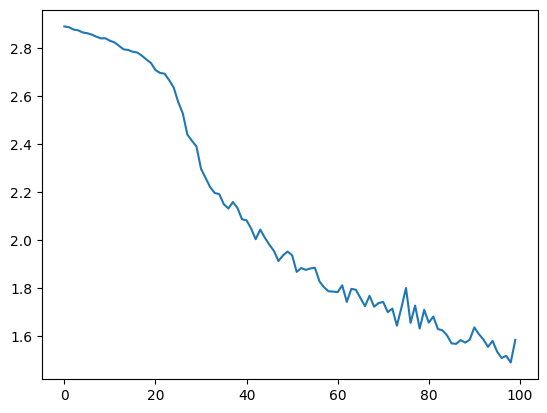

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

<ipython-input-18-a5b341ffc3a3>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-18-a5b341ffc3a3>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


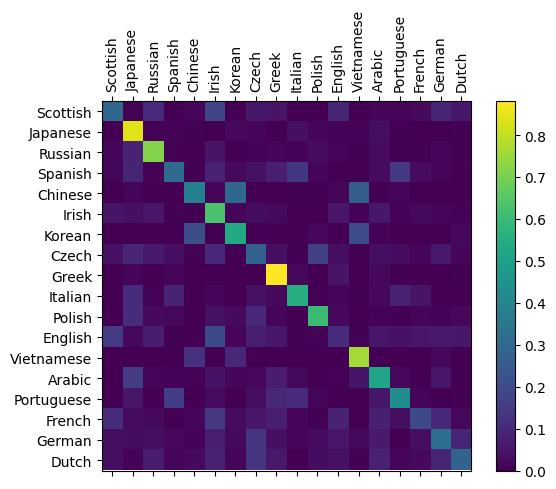

In [18]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()